In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
# Now we'll learn how ot visualize multiple regression with lmplot()

# Luckily, Seaborn comes with an example dataset to use as a pandas DataFrame
tips = sns.load_dataset("tips")

In [3]:
# Preview
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


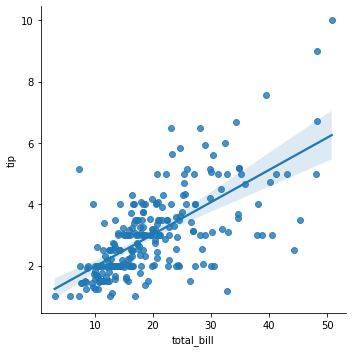

In [6]:
# Let's use lmplot() to plot the total bill versus tips
sns.lmplot(x="total_bill",y="tip",data=tips)

In [7]:
# First we can see a scatter plot of all the points, tip vs total_bill
# Then we see a linear regression line, which is an estimateed linear fit model to the data

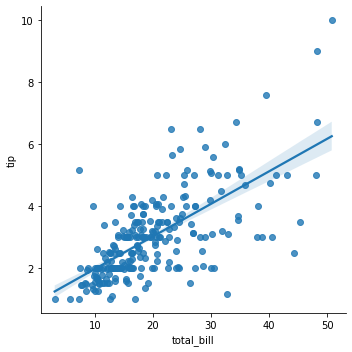

In [8]:
# WE can also specify teh confidence interval to use for the linear fit

sns.lmplot(x="total_bill",y="tip",data=tips,ci=75)

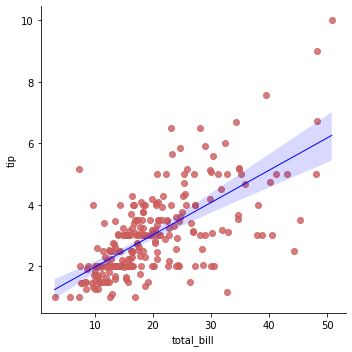

In [10]:
# Just like before, we can use dictionaries to edit individual parts of the plot

sns.lmplot(x="total_bill",y="tip", data=tips,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"});

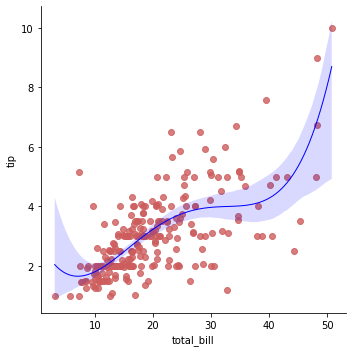

In [11]:
# WE can also check out higher-order trends
sns.lmplot(x="total_bill",y="tip", data = tips,order=4,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"})

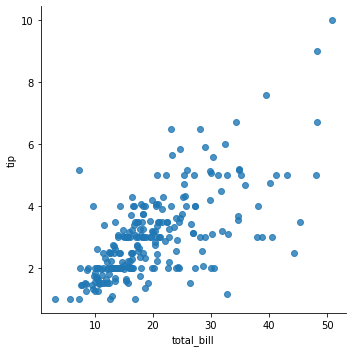

In [13]:
# We can also not fit a regression if desired
sns.lmplot(x="total_bill",y="tip",data=tips,fit_reg=False)

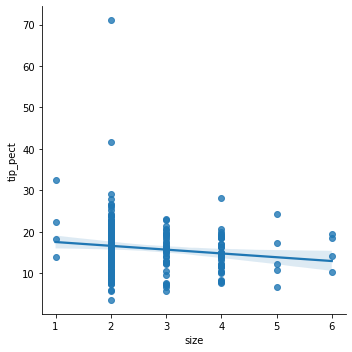

In [14]:
# lmplot() also works on discrete variables, such as the percentage of the tip

# Create a new column for tip percentage
tips["tip_pect"]=100*(tips['tip']/tips['total_bill'])

#plot
sns.lmplot(x="size", y="tip_pect", data=tips);

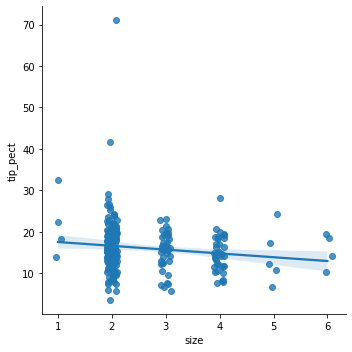

In [15]:
# We can also add jitter to this

#plot
sns.lmplot(x="size", y="tip_pect", data=tips,x_jitter=.1);

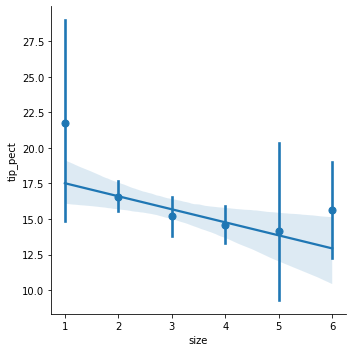

In [16]:
# We can also estimate the tendency of each bin (size of party in this case)
sns.lmplot(x="size",y="tip_pect", data=tips, x_estimator=np.mean);

In [17]:
# Interesting, looks like there is more variance for party sizes of 1 then 2-4

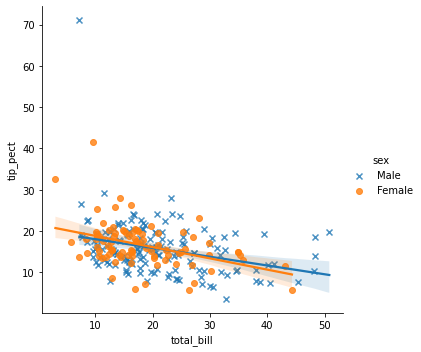

In [18]:
# We can use the hue facet to automatically define subsets along a column

# Plot, note the markers argument
sns.lmplot(x="total_bill", y="tip_pect", data=tips, hue="sex",markers=["x","o"])

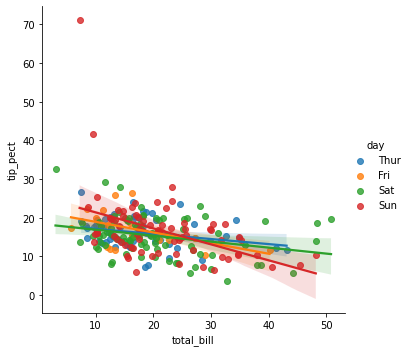

In [19]:
# Does day make a difference?
sns.lmplot(x="total_bill",y="tip_pect", data=tips, hue="day")

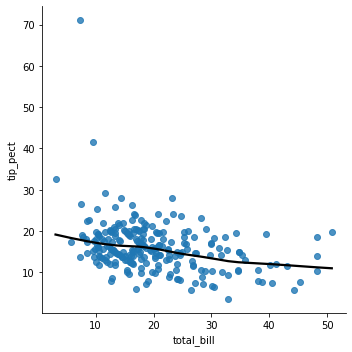

In [20]:
# Finally it should be noted that Seabron supports LOESS model fitting
url = 'http://en.wikipedia.org/wiki/Local_regression'

sns.lmplot(x="total_bill", y="tip_pect", data=tips, lowess=True, line_kws={"color": 'black'});

<AxesSubplot:xlabel='total_bill', ylabel='tip_pect'>

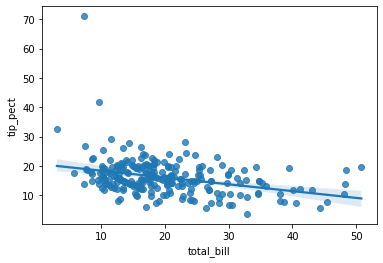

In [21]:
# The lmplot() we've been using is actually using a lower-level function, regplot()

sns.regplot(x="total_bill",y="tip_pect",data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip_pect'>

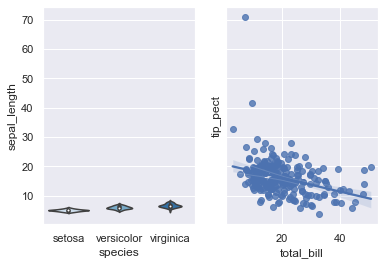

In [47]:
# reg_plot can be added to existing axes without modifying anything in the figure

# Create figure with 2 subplots
fig, (axis1,axis2) = plt.subplots(1,2,sharey =True)

sns.violinplot(x=df["species"], y=df["sepal_length"], palette="Blues", style="darkgrid",ax=axis1)
sns.regplot(x="total_bill",y="tip_pect",data=tips,ax=axis2)
